In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read csv file and store in dataframe:

data = "Data/cleaned_data.csv"
df = pd.read_csv(data)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Keep only the features that we want to test, as determined in the feature importance portion of data cleanup:

df = df[['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'LotArea',
 'GarageCars',
 'SalePrice']]

df

,OverallQual,GrLivArea,2ndFlrSF,BsmtFinSF1,TotalBsmtSF,1stFlrSF,FullBath,LotArea,GarageCars,SalePrice
0,7,1710,854,706,856,856,2,8450,2,208500
1,6,1262,0,978,1262,1262,2,9600,2,181500
2,7,1786,866,486,920,920,2,11250,2,223500
3,7,1717,756,216,756,961,1,9550,3,140000
4,8,2198,1053,655,1145,1145,2,14260,3,250000
...,...,...,...,...,...,...,...,...,...,...
1089,6,1647,694,0,953,953,2,7917,2,175000
1090,6,2073,0,790,1542,2073,2,13175,2,210000
1091,7,2340,1152,275,1152,1188,2,9042,1,266500
1092,5,1078,0,49,1078,1078,1,9717,1,142125


In [4]:
# Extract target output from dataset:

X = df.drop(columns = ["SalePrice"])
Y = df["SalePrice"]

In [5]:
# Split data into train and test datasets:

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [6]:
# Create and fit linear regression model to train dataset:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# Make predictions using the model:

predictions = model.predict(x_test)

In [10]:
# Determine mean_squared_error and model accuracy score:

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(x_test, y_test)

In [11]:
# Print mean squared error model accuracy score:

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1320618136.16643, R2: 0.7998199431072025


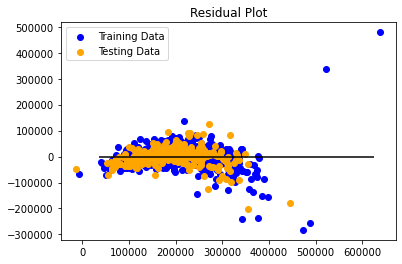

In [15]:
# Plot the predicted values and actual values:

plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()